In [49]:
from IPython.display import Image
import pandas as pd
import numpy as np
import scipy as sc
import sqlite3
from bs4 import BeautifulSoup


In [8]:
# Image(filename = 'D:\Harsha\My python Practise\Formulas Pictures\Accuracy.png')

In [19]:
data = pd.read_csv('D:\Python27\Irisdata.csv')

con = sqlite3.connect('D:\Python27\database.sqlite')
filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 LIMIT 5000""", con) 


def partition(x):
    if x < 3:
        return 0
    return 1
# Changing the score less than 3 to be positive and vice versa
actualscore = filtered_data['Score']
positiveNegative = actualscore.map(partition)
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
# filtered_data.head(3)
filtered_data.keys()

('Number of data points in our data', (5000, 10))


Index([u'Id', u'ProductId', u'UserId', u'ProfileName', u'HelpfulnessNumerator',
       u'HelpfulnessDenominator', u'Score', u'Time', u'Summary', u'Text'],
      dtype='object')

## Sorting the data

In [22]:
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

## Removing the duplicates from the rows  - Deduplication

In [28]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
print final.shape
print "="*50
print "removed 5000 - 4986 = 14 duplicated rows from the dataset"

(4986, 10)
removed 5000 - 4986 = 14 duplicated rows from the dataset


In [48]:
sent_1500 = final['Text'].values[1500]
print(sent_1500)
print("="*50)


Wow.  So far, two two-star reviews.  One obviously had no idea what they were ordering; the other wants crispy cookies.  Hey, I'm sorry; but these reviews do nobody any good beyond reminding us to look  before ordering.<br /><br />These are chocolate-oatmeal cookies.  If you don't like that combination, don't order this type of cookie.  I find the combo quite nice, really.  The oatmeal sort of "calms" the rich chocolate flavor and gives the cookie sort of a coconut-type consistency.  Now let's also remember that tastes differ; so, I've given my opinion.<br /><br />Then, these are soft, chewy cookies -- as advertised.  They are not "crispy" cookies, or the blurb would say "crispy," rather than "chewy."  I happen to like raw cookie dough; however, I don't see where these taste like raw cookie dough.  Both are soft, however, so is this the confusion?  And, yes, they stick together.  Soft cookies tend to do that.  They aren't individually wrapped, which would add to the cost.  Oh yeah, cho

# Text Preprocessing

<p>
    1. Replace Special Character with Space <br>
    2. Replace multiple spaces with single space <br>
    3. Converting all characters to lower case<br>
    4. Removing unnecessary words using stop words <br>
    5. If there is any '(apostrophes) remove them <br>
    6. Stemming<br>
    7. Lemmitization<br>
    8. Removing the URL
    </p>

In [38]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [55]:
# Stop words removal 
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
englishStemmer=SnowballStemmer("english", ignore_stopwords=True)
# enlishStemmer = englishStemmer.stem("having")

In [63]:
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
#     sentance = ' '.join()
    preprocessed_reviews.append(sentance.strip())

100%|████████████████████████████████████████████████████████████████████████████| 4986/4986 [00:02<00:00, 1724.07it/s]


In [64]:
preprocessed_reviews[1500]

u'wow far two two star reviews one obviously idea ordering wants crispy cookies hey sorry reviews nobody good beyond reminding us look ordering chocolate oatmeal cookies like combination order type cookie find combo quite nice really oatmeal sort calms rich chocolate flavor gives cookie sort coconut type consistency let also remember tastes differ given opinion soft chewy cookies advertised crispy cookies blurb would say crispy rather chewy happen like raw cookie dough however see taste like raw cookie dough soft however confusion yes stick together soft cookies tend individually wrapped would add cost oh yeah chocolate chip cookies tend somewhat sweet want something hard crisp suggest nabiso ginger snaps want cookie soft chewy tastes like combination chocolate oatmeal give try place second order'

In [68]:
preprocessed_reviews[1]

u'used victor fly bait seasons ca beat great product'

## Stemming & Lemmitization

<p> Lemmatization is similar to stemming but it brings context to the words. So it goes a steps further by linking words with similar meaning to one word. For example if a paragraph has words like cars, trains and automobile, then it will link all of them to automobile. In the below program we use the WordNet lexical database for lemmatization </p>

In [77]:
# Stemming
import nltk
from nltk.stem.porter import PorterStemmer
porterstemmer = PorterStemmer()
word_data = preprocessed_reviews[1]
nltk.tokens = nltk.word_tokenize(word_data)
for w in nltk.tokens:
    print "Actual: %s -- After Stemming: %s" %(w, porterstemmer.stem(w))

Actual: used -- After Stemming: use
Actual: victor -- After Stemming: victor
Actual: fly -- After Stemming: fli
Actual: bait -- After Stemming: bait
Actual: seasons -- After Stemming: season
Actual: ca -- After Stemming: ca
Actual: beat -- After Stemming: beat
Actual: great -- After Stemming: great
Actual: product -- After Stemming: product


In [80]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
wordNet = WordNetLemmatizer()
word_data = preprocessed_reviews[1]
nltk_tokens = nltk.word_tokenize(word_data)
for Y in nltk_tokens:
    print "Actual: %s -- After Lemmatization: %s" %(Y, wordNet.lemmatize(Y))

Actual: used -- After Lemmatization: used
Actual: victor -- After Lemmatization: victor
Actual: fly -- After Lemmatization: fly
Actual: bait -- After Lemmatization: bait
Actual: seasons -- After Lemmatization: season
Actual: ca -- After Lemmatization: ca
Actual: beat -- After Lemmatization: beat
Actual: great -- After Lemmatization: great
Actual: product -- After Lemmatization: product


## Vectorizing the data

1. Bag of Words
2. TF-IDF
3. Word2Vec

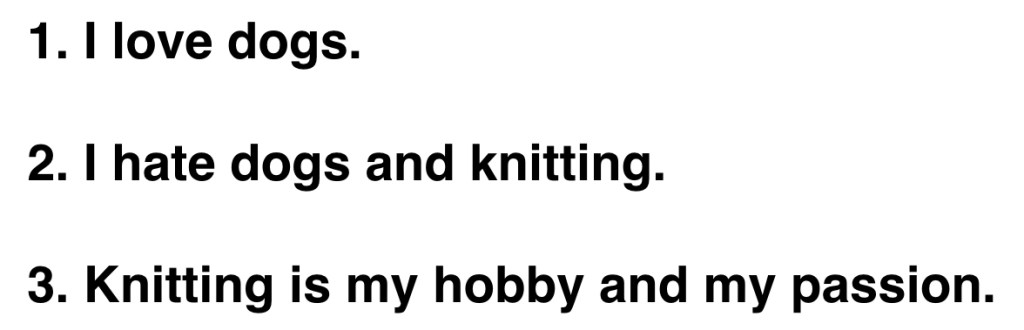

In [93]:
Image(filename = 'D:\Harsha\My python Practise\Formulas Pictures\BOW1.jpeg')


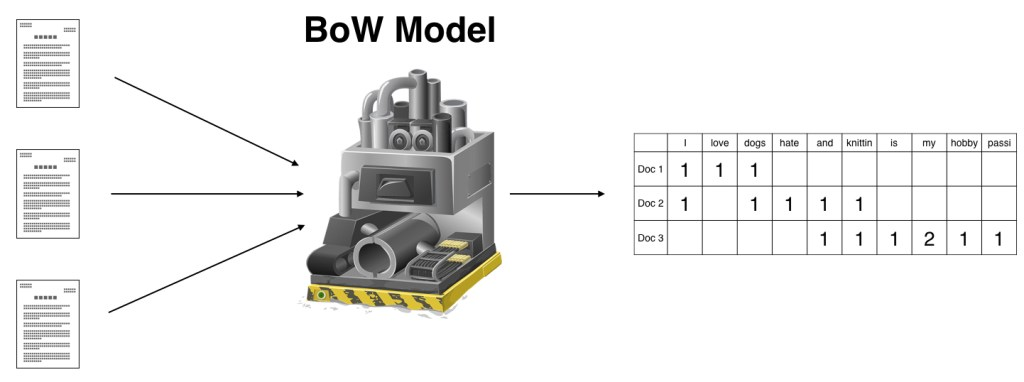

In [92]:
Image(filename = 'D:\Harsha\My python Practise\Formulas Pictures\BOW.jpeg')

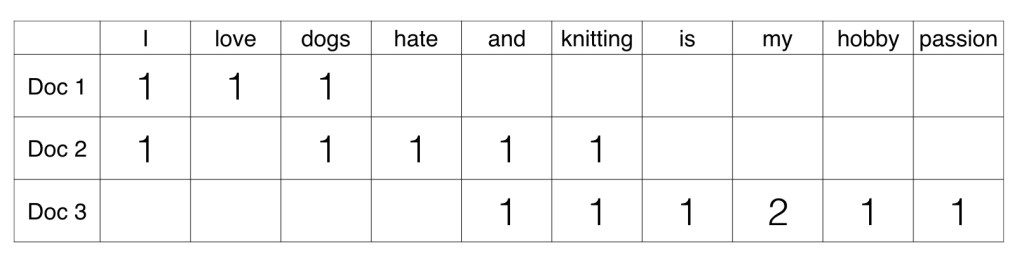

In [91]:
Image(filename = 'D:\Harsha\My python Practise\Formulas Pictures\BOW 2.jpeg')

In [83]:
#Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
Count_vect = CountVectorizer()
Count_vect.fit(preprocessed_reviews)
Counts = Count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(Counts))
print("the shape of out text BOW vectorizer ",Counts.get_shape())
print("the number of unique words ", Counts.get_shape()[1])

('the type of count vectorizer ', <class 'scipy.sparse.csr.csr_matrix'>)
('the shape of out text BOW vectorizer ', (4986, 12994))
('the number of unique words ', 12994)


## TF-IDF

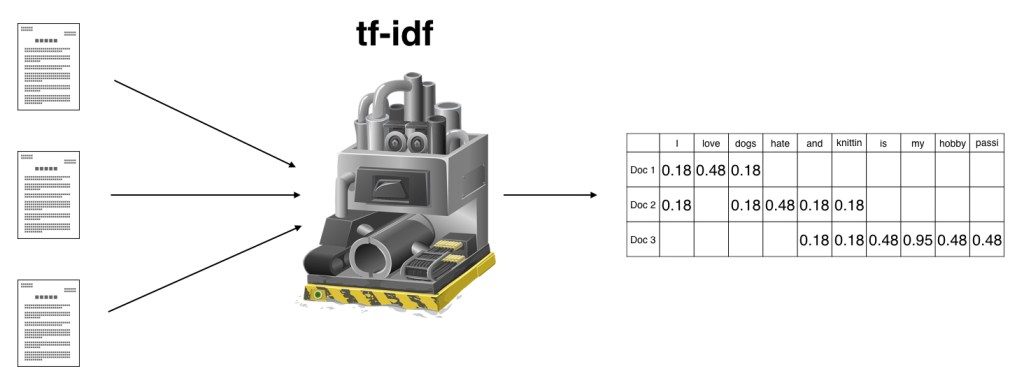

In [98]:
Image(filename = 'D:\Harsha\My python Practise\Formulas Pictures\TF-IDF.jpeg')

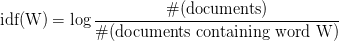

In [105]:
Image(filename = 'D:\Harsha\My python Practise\Formulas Pictures\TF-IDF2.png')

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tfidf.fit(preprocessed_reviews)
tfidf_counts = tfidf.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(tfidf_counts))
print("the shape of out text BOW vectorizer ",tfidf_counts.getshape())
print("the number of unique words ", tfidf_counts.get_shape()[1])

('the type of count vectorizer ', <class 'scipy.sparse.csr.csr_matrix'>)
('the shape of out text BOW vectorizer ', (4986, 2964))
('the number of unique words ', 2964)


## Word2Vec

In [113]:
from gensim.models import Word2Vec
i=0
list_of_sentance=[]
for sentance in preprocessed_reviews:
    list_of_sentance.append(sentance.split())
if want_to_train_w2v:
    w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))

[(u'good', 0.9964841604232788), (u'excellent', 0.9944636821746826), (u'enjoy', 0.9941874146461487), (u'snack', 0.9941748380661011), (u'tasting', 0.9941446781158447), (u'tasty', 0.9941045641899109), (u'overpowering', 0.9937001466751099), (u'wonderful', 0.9931952953338623), (u'flavorful', 0.9931759238243103), (u'pronounced', 0.9930337071418762)]
[(u'varieties', 0.9994055032730103), (u'served', 0.9993997812271118), (u'experience', 0.9993453025817871), (u'turned', 0.9993396997451782), (u'looks', 0.9993218779563904), (u'stash', 0.9993204474449158), (u'superior', 0.999311089515686), (u'oh', 0.9993060827255249), (u'start', 0.9993026256561279), (u'uses', 0.9993006587028503)]
